In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aribis369/loan/main/Modeling%20dataset.csv')
df.head()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,Current
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,Fully Paid
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,Fully Paid
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,Current
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,Fully Paid


In [3]:
df.describe()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,6.851470e+05,11235.113333,5.037667,6.818813e+04,0.143667,0.869133,90.317000,125.894133,9.327333,0.053600,13482.444933,0.489505,22.270933
std,2.084107e+05,7417.557711,3.352978,5.101434e+04,0.477188,1.062865,42.309275,19.084559,4.444776,0.233089,16094.076787,0.282652,11.528179
min,5.473400e+04,500.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5.203982e+05,5500.000000,2.000000,4.056300e+04,0.000000,0.000000,48.000000,130.000000,6.000000,0.000000,3716.500000,0.260000,14.000000
50%,6.701385e+05,10000.000000,4.000000,5.900000e+04,0.000000,1.000000,120.000000,130.000000,9.000000,0.000000,8901.000000,0.490000,21.000000
75%,8.372712e+05,15000.000000,8.000000,8.200000e+04,0.000000,1.000000,120.000000,130.000000,12.000000,0.000000,17117.500000,0.720000,29.000000
max,1.075269e+06,35000.000000,10.000000,2.039784e+06,8.000000,8.000000,120.000000,130.000000,42.000000,4.000000,149527.000000,1.000000,81.000000


In [4]:
df.shape

(15000, 17)

In [5]:
df['purpose'].value_counts()

debt_consolidation    7101
credit_card           1856
other                 1466
home_improvement      1178
major_purchase         830
small_business         678
car                    608
wedding                373
medical                271
moving                 198
vacation               144
house                  135
educational            122
renewable_energy        40
Name: purpose, dtype: int64

In [6]:
df['loan_status'].value_counts()

Fully Paid            9416
Current               3542
Charged Off           1872
Late (31-120 days)      78
In Grace Period         63
Late (16-30 days)       23
Default                  6
Name: loan_status, dtype: int64

In [ ]:
#df['loan_status'] = df['loan_status'].replace(['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default'], '0')
#df['loan_status'] = df['loan_status'].replace(['Fully Paid','Current'], '1')


df['loan_status'] = df['loan_status'].replace(['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Current','Default'], '0')
df['loan_status'] = df['loan_status'].replace(['Fully Paid'], '1')

1: good loans, 0: bad loans

In [ ]:
df['loan_status'].value_counts()

1    9416
0    5584
Name: loan_status, dtype: int64

In [ ]:
df['purpose'].value_counts()

debt_consolidation    7101
credit_card           1856
other                 1466
home_improvement      1178
major_purchase         830
small_business         678
car                    608
wedding                373
medical                271
moving                 198
vacation               144
house                  135
educational            122
renewable_energy        40
Name: purpose, dtype: int64

In [ ]:
dfp = df[['loan_amnt','loan_status']] 

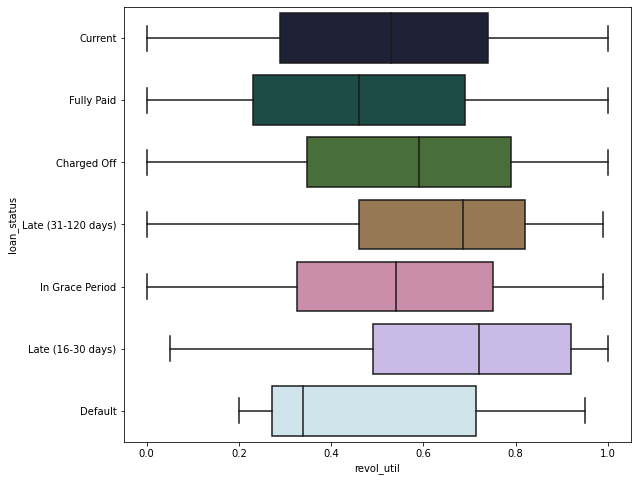

In [18]:
plt.figure(figsize=(20,8))

#plt.subplot(1,2,1)
#sns.countplot(df.loan_status, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(x=df['revol_util'], y=df.loan_status, palette=("cubehelix"))

plt.show()

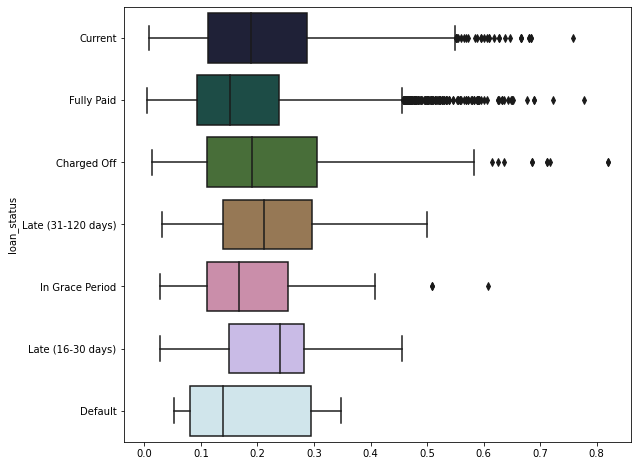

In [17]:
plt.figure(figsize=(20,8))

#plt.subplot(1,2,1)
#sns.countplot(df.loan_status, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(x=df['loan_amnt']/df['annual_inc'], y=df.loan_status, palette=("cubehelix"))

plt.show()

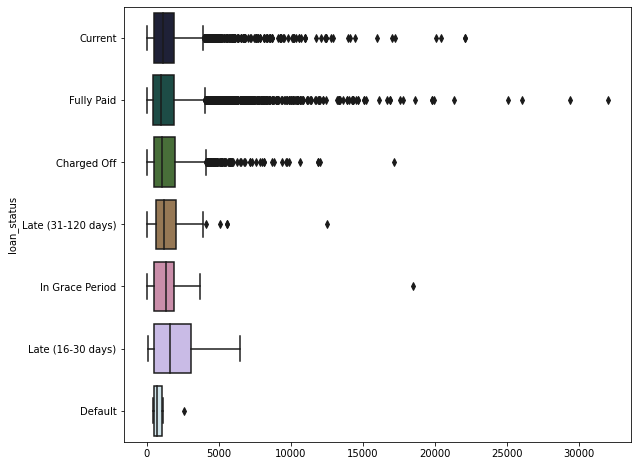

In [16]:
plt.figure(figsize=(20,8))

#plt.subplot(1,2,1)
#sns.countplot(df.loan_status, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(x=df['revol_bal']/df['open_acc'], y=df.loan_status, palette=("cubehelix"))

plt.show()

In [ ]:
revol_util, loan_amnt_1, annual_inc_1, revol_bal_2, open_acc_2, total_acc_3, open_acc_3, inq_last_6mths_-, purpose_(measure risk factor), year, 

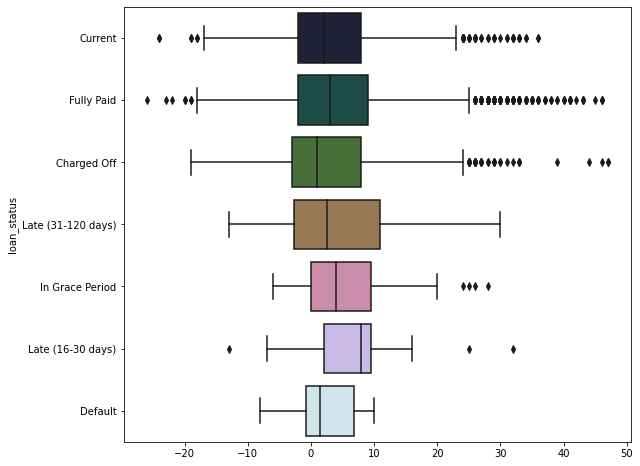

In [20]:
plt.figure(figsize=(20,8))

#plt.subplot(1,2,1)
#sns.scatterplot(df.loan_status, df.annual_inc)

plt.subplot(1,2,2)
#sns.boxplot(x=df.revol_util, y=df.loan_status, palette=("cubehelix"))
sns.boxplot(x=df['total_acc']-2*df['open_acc'], y=df.loan_status, palette=("cubehelix"))


plt.show()

In [21]:
pd.set_option('display.max_rows', 500)

print(df.groupby(['purpose', 'loan_status']).size())

purpose             loan_status       
car                 Charged Off             70
                    Current                167
                    Fully Paid             369
                    In Grace Period          1
                    Late (31-120 days)       1
credit_card         Charged Off            156
                    Current                454
                    Default                  1
                    Fully Paid            1228
                    In Grace Period          5
                    Late (16-30 days)        2
                    Late (31-120 days)      10
debt_consolidation  Charged Off            897
                    Current               1717
                    Default                  3
                    Fully Paid            4402
                    In Grace Period         24
                    Late (16-30 days)       15
                    Late (31-120 days)      43
educational         Charged Off             27
                    C

In [22]:
debt_consolidation = 879/4402
car = 70/369
credit_card = 156/1228
educational = 27/93
home_improvement = 118/736
house = 17/90
major_purchase = 57/582
medical = 44/157
moving = 27/118
other = 203/937
renewable_energy = 8/22
small_business = 178/336
vacation = 18/94
wedding = 30/252

In [23]:
print(debt_consolidation)#2
print(car)#1
print(credit_card)#0
print(educational)#2
print(home_improvement)#1
print(house)#1
print(major_purchase)#0
print(medical)#2
print(moving)#2
print(other)#2
print(renewable_energy)#2
print(small_business)#2
print(vacation)#1
print(wedding)#0

0.1996819627442072
0.1897018970189702
0.1270358306188925
0.2903225806451613
0.16032608695652173
0.18888888888888888
0.0979381443298969
0.2802547770700637
0.2288135593220339
0.21664887940234792
0.36363636363636365
0.5297619047619048
0.19148936170212766
0.11904761904761904


In [24]:
df['purpose'] = df['purpose'].replace(['credit_card','major_purchase','wedding'], '0')
df['purpose'] = df['purpose'].replace(['car','home_improvement','house','vacation'], '1')
df['purpose'] = df['purpose'].replace(['educational','other','renewable_energy','small_business','debt_consolidation','moving','medical'], '2')

In [25]:
df['purpose'].value_counts()

2    9876
0    3059
1    2065
Name: purpose, dtype: int64

In [26]:
df['purpose'] = pd.to_numeric(df['purpose'])

loan_status
Charged Off           AxesSubplot(0.125,0.125;0.775x0.755)
Current               AxesSubplot(0.125,0.125;0.775x0.755)
Default               AxesSubplot(0.125,0.125;0.775x0.755)
Fully Paid            AxesSubplot(0.125,0.125;0.775x0.755)
In Grace Period       AxesSubplot(0.125,0.125;0.775x0.755)
Late (16-30 days)     AxesSubplot(0.125,0.125;0.775x0.755)
Late (31-120 days)    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year, dtype: object

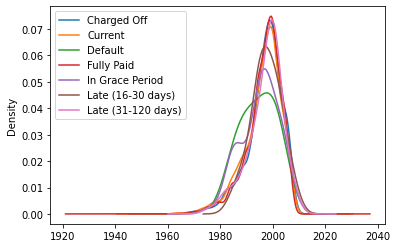

In [ ]:
df.groupby('loan_status').year.plot(kind='kde', legend=True)


#df.groupby('loan_status').emp_length.plot(kind='kde', legend=True)

#df.groupby('loan_status').inq_last_6mths.hist(legend=True)



In [27]:
df['earliest_cr_line'][0]

df['year'] = pd.DatetimeIndex(pd.to_datetime(df['earliest_cr_line'])).year

In [28]:
print(df.groupby(['year', 'loan_status']).size())

year  loan_status       
1950  Fully Paid              1
1956  Fully Paid              1
1961  Fully Paid              2
1962  Fully Paid              1
1963  Current                 2
      Fully Paid              1
1964  Current                 2
      Fully Paid              1
1965  Current                 1
1966  Charged Off             1
      Current                 1
      Fully Paid              2
1967  Charged Off             1
      Fully Paid              3
1968  Charged Off             1
      Current                 2
1969  Charged Off             2
      Current                 1
      Fully Paid              7
1970  Charged Off             2
      Current                 3
      Fully Paid             12
1971  Charged Off             1
      Current                 4
      Fully Paid              9
1972  Charged Off             2
      Current                 6
      Fully Paid              6
1973  Charged Off             4
      Current                 8
      Fully Pai

In [29]:
df.describe()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,purpose,year
count,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,6.851470e+05,11235.113333,5.037667,6.818813e+04,0.143667,0.869133,90.317000,125.894133,9.327333,0.053600,13482.444933,0.489505,22.270933,1.454467,1996.578600
std,2.084107e+05,7417.557711,3.352978,5.101434e+04,0.477188,1.062865,42.309275,19.084559,4.444776,0.233089,16094.076787,0.282652,11.528179,0.809838,6.785796
min,5.473400e+04,500.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1950.000000
25%,5.203982e+05,5500.000000,2.000000,4.056300e+04,0.000000,0.000000,48.000000,130.000000,6.000000,0.000000,3716.500000,0.260000,14.000000,1.000000,1993.000000
50%,6.701385e+05,10000.000000,4.000000,5.900000e+04,0.000000,1.000000,120.000000,130.000000,9.000000,0.000000,8901.000000,0.490000,21.000000,2.000000,1998.000000
75%,8.372712e+05,15000.000000,8.000000,8.200000e+04,0.000000,1.000000,120.000000,130.000000,12.000000,0.000000,17117.500000,0.720000,29.000000,2.000000,2001.000000
max,1.075269e+06,35000.000000,10.000000,2.039784e+06,8.000000,8.000000,120.000000,130.000000,42.000000,4.000000,149527.000000,1.000000,81.000000,2.000000,2008.000000


# Model

In [31]:
dtrain = pd.DataFrame()

dtrain['revol_util'] = df['revol_util']
dtrain['lir'] = df['loan_amnt']/df['annual_inc']
dtrain['tod'] = df['total_acc']-df['open_acc']
dtrain['revol_bal'] = df['revol_bal']
dtrain['loan_amnt'] = df['loan_amnt']
dtrain['prisk'] = df['purpose']
dtrain['year'] = df['year']
dtrain['loan_status'] = df['loan_status']

In [32]:
dtrain.head()

,revol_util,lir,tod,revol_bal,loan_amnt,prisk,year,loan_status
0,0.41,0.322581,22,43209,30000,2,1990,Current
1,0.85,0.314286,25,38928,22000,2,1983,Fully Paid
2,0.86,0.031624,15,19382,3700,0,1992,Fully Paid
3,0.48,0.223556,8,1962,7600,2,2003,Current
4,0.51,0.160000,10,13528,12000,2,1997,Fully Paid


In [33]:
dtrain.describe()

,revol_util,lir,tod,revol_bal,loan_amnt,prisk,year
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.489505,0.189412,12.943600,13482.444933,11235.113333,1.454467,1996.578600
std,0.282652,0.117699,9.084378,16094.076787,7417.557711,0.809838,6.785796
min,0.000000,0.004143,-6.000000,0.000000,500.000000,0.000000,1950.000000
25%,0.260000,0.100000,6.000000,3716.500000,5500.000000,1.000000,1993.000000
50%,0.490000,0.166667,11.000000,8901.000000,10000.000000,2.000000,1998.000000
75%,0.720000,0.256410,18.000000,17117.500000,15000.000000,2.000000,2001.000000
max,1.000000,0.819672,58.000000,149527.000000,35000.000000,2.000000,2008.000000


In [34]:
dt = dtrain[(dtrain['loan_status']=='Fully Paid') | (dtrain['loan_status']=='Charged Off')]

In [35]:
dt.head()

,revol_util,lir,tod,revol_bal,loan_amnt,prisk,year,loan_status
1,0.85,0.314286,25,38928,22000,2,1983,Fully Paid
2,0.86,0.031624,15,19382,3700,0,1992,Fully Paid
4,0.51,0.160000,10,13528,12000,2,1997,Fully Paid
5,0.66,0.121975,7,1774,5000,2,2006,Fully Paid
6,0.83,0.093750,12,12447,5250,2,1995,Fully Paid


In [36]:
dt['loan_status'].value_counts()

Fully Paid     9416
Charged Off    1872
Name: loan_status, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pickle import load, dump


In [69]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('loan_status',axis=1), 
                                                    dt['loan_status'], test_size=0.3, 
                                                    random_state=101)

In [39]:
#model = LogisticRegression()
model = tree.DecisionTreeClassifier()
#model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
#model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Charged Off       0.39      0.43      0.41       555
  Fully Paid       0.89      0.87      0.88      2832

    accuracy                           0.80      3387
   macro avg       0.64      0.65      0.64      3387
weighted avg       0.81      0.80      0.80      3387



In [41]:
#model = LogisticRegression()
#model = tree.DecisionTreeClassifier()
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
#model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Charged Off       0.83      0.30      0.44       555
  Fully Paid       0.88      0.99      0.93      2832

    accuracy                           0.87      3387
   macro avg       0.85      0.64      0.68      3387
weighted avg       0.87      0.87      0.85      3387



In [74]:
#model = LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
#model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Charged Off       0.67      0.31      0.43       555
  Fully Paid       0.88      0.97      0.92      2832

    accuracy                           0.86      3387
   macro avg       0.78      0.64      0.67      3387
weighted avg       0.84      0.86      0.84      3387



In [86]:
#model = LogisticRegression()
#model = tree.DecisionTreeClassifier()
#model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
#model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(predictions)
predictions_p = model.predict_proba(X_test)

predictions = predictions_p[:,1]
print(predictions)

predictions_ = []
for i in range(len(predictions)):
  if predictions[i]>=0.85:
    predictions_.append('Fully Paid')
  else:
    predictions_.append('Charged Off')
print(predictions_)

['Fully Paid' 'Fully Paid' 'Fully Paid' ... 'Fully Paid' 'Fully Paid'
 'Fully Paid']
[0.92325103 0.9585921  0.9358487  ... 0.9698267  0.9833317  0.9392642 ]
['Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', '

In [87]:
print(classification_report(y_test,predictions_))

              precision    recall  f1-score   support

 Charged Off       0.36      0.53      0.43       555
  Fully Paid       0.90      0.82      0.85      2832

    accuracy                           0.77      3387
   macro avg       0.63      0.67      0.64      3387
weighted avg       0.81      0.77      0.78      3387



In [49]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [56]:
model = tree.DecisionTreeClassifier()
#model = LogisticRegression()
#model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
#model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
#model = XGBClassifier()
model.fit(X_train_s,y_train)
predictions = model.predict(X_test_s)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Charged Off       0.39      0.43      0.41       555
  Fully Paid       0.89      0.87      0.88      2832

    accuracy                           0.80      3387
   macro avg       0.64      0.65      0.64      3387
weighted avg       0.80      0.80      0.80      3387



In [54]:
#model = tree.DecisionTreeClassifier()
#model = LogisticRegression()
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
#model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
#model = XGBClassifier()
model.fit(X_train_s,y_train)
predictions = model.predict(X_test_s)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

 Charged Off       0.82      0.30      0.44       555
  Fully Paid       0.88      0.99      0.93      2832

    accuracy                           0.87      3387
   macro avg       0.85      0.64      0.68      3387
weighted avg       0.87      0.87      0.85      3387



In [57]:
df_ = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['loan_status','id','earliest_cr_line','desc'],axis=1), 
                                                    df_['loan_status'], test_size=0.2, 
                                                    random_state=101)

In [59]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_train_ = pca.fit_transform(X_train)
#print(X_train_)
X_test_ = pca.transform(X_test)
#print(X_test_)


In [61]:
weights = {'Charged Off':5.5, 'Fully Paid':1.0}
#model = tree.DecisionTreeClassifier()
##model = tree.DecisionTreeClassifier(class_weight=weights, max_depth=10)
#model = tree.DecisionTreeClassifier(max_depth=20)
#model = LogisticRegression()
#model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=0)
#model = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=10)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, scale_pos_weight=0.1)
#model = XGBClassifier()
model.fit(X_train_,y_train)
predictions = model.predict(X_test_)
print(predictions)
predictions_p = model.predict_proba(X_test_)

predictions = predictions_p[:,1]
print(predictions)

predictions_ = []
for i in range(len(predictions)):
  if predictions[i]>=0.6:
    predictions_.append('Fully Paid')
  else:
    predictions_.append('Charged Off')
print(predictions_)

['Fully Paid' 'Fully Paid' 'Charged Off' ... 'Charged Off' 'Charged Off'
 'Charged Off']
[0.6523131  0.6849332  0.38411444 ... 0.40265623 0.19011894 0.31735623]
['Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Charged Off', 'Charged Off', 'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Pa

In [62]:
print(classification_report(y_test,predictions_))

              precision    recall  f1-score   support

 Charged Off       0.23      0.78      0.36       372
  Fully Paid       0.92      0.49      0.64      1886

    accuracy                           0.54      2258
   macro avg       0.58      0.64      0.50      2258
weighted avg       0.81      0.54      0.59      2258



In [63]:
print(predictions_p)

[[0.3476869  0.6523131 ]
 [0.3150668  0.6849332 ]
 [0.61588556 0.38411444]
 ...
 [0.5973438  0.40265623]
 [0.8098811  0.19011894]
 [0.6826438  0.31735623]]


In [64]:
dump(model, open('model.pkl', 'wb'))
dump(scaler, open('scaler.pkl', 'wb'))
dump(pca, open('pca.pkl', 'wb'))

In [65]:
model_ = load(open('model.pkl', 'rb'))
scaler_ = load(open('scaler.pkl', 'rb'))
pca_ = load(open('pca.pkl', 'rb'))

In [67]:
df_ = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]

dk = df_.drop(['loan_status','id','earliest_cr_line','desc'],axis=1)
#print(dk.head())

X_train, X_test, y_train, y_test = train_test_split(df_.drop(['loan_status','id','earliest_cr_line','desc'],axis=1), 
                                                    df_['loan_status'], test_size=0.3, 
                                                    random_state=101)

X_one = dk.iloc[5]
X_one_ = np.array(X_one).reshape(1, -1)
print(X_one_)

X_test = scaler_.transform(X_test)
X_one_ = scaler_.transform(X_one_)

X_test_ = pca_.transform(X_test)
X_one_ = pca_.transform(X_one_)
#print(X_test_)

predictions = model_.predict(X_test_)
prediction = model_.predict(X_one_)

prediction_p = model_.predict_proba(X_one_)


print(classification_report(y_test,predictions))
print(prediction[0])
print(np.array(y_test)[0])

print(type(prediction_p[0][1]))

predictions_p = model_.predict_proba(X_test_)
print(predictions_p)

[[1.000e+04 1.000e+01 1.600e+05 0.000e+00 2.000e+00 7.700e+01 1.300e+02
  1.000e+01 0.000e+00 7.770e+03 2.100e-01 3.000e+01 1.000e+00 1.984e+03]]
              precision    recall  f1-score   support

 Charged Off       0.33      0.78      0.46       555
  Fully Paid       0.94      0.69      0.79      2832

    accuracy                           0.70      3387
   macro avg       0.63      0.73      0.63      3387
weighted avg       0.84      0.70      0.74      3387

Fully Paid
Fully Paid
<class 'numpy.float32'>
[[0.3476869  0.6523131 ]
 [0.3150668  0.6849332 ]
 [0.61588556 0.38411444]
 ...
 [0.36160892 0.6383911 ]
 [0.20511329 0.7948867 ]
 [0.675618   0.324382  ]]


In [ ]:
dk.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,purpose,year
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,2,1983
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,0,1992
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,2,1997
5,5000,7,40992.0,0,0,120,130,2,0,1774,0.66,9,2,2006
6,5250,2,56000.0,0,1,120,130,3,0,12447,0.83,15,2,1995


In [ ]:
from google.colab import files

files.download('model.pkl')
#files.download('scaler.pkl')
#files.download('pca.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import xgboost

xgboost.__version__


'0.90'